In [1]:
import pandas as pd
import numpy as np
import Auto_Timeseries_Final as AT

Imported Auto_Timeseries version: 0.0.11. Call by using Auto_Timeseries(trainfile, ts_column,
                            sep=',', target=None, score_type='rmse', forecast_period=2,
                            timeinterval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None,
                            verbose=0)
    To get detailed charts of actuals and forecasts, set verbose = 1


In [2]:
datapath = '../data_sets/'
#datapath = ''
filename1 = 'Google_Stock_Price_Train.csv'
#filename2 = 'test.csv'

In [3]:
train = pd.read_csv(datapath+filename1,index_col=None)
print(train.shape)
train.head(1)

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"


In [4]:
#dft = dft.iloc[::48,]
dft = train[:1000]
print(dft.shape)
dft.head()

(1000, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
ts_column = 'Date'
sep = ','
target = 'Close'
dft[[ts_column,target]].isnull().sum()

Date     0
Close    0
dtype: int64

In [6]:
score_type = 'rmse'
forecast_period = 5
timeinterval = 'Daily'
non_seasonal_pdq = (3,1,3)
seasonality = True
seasonal_periods = 24

In [7]:
import sys
sys.path.append("../ram_code/")
import Generic_Functions as GF

Imported Generic Functions.


In [8]:
dft = GF.remove_comma_in_columns(dft, cols=['Open','High','Low','Close'], verbose=0)

Dataframe given as input. Analyzing Time Series data...
    Target variable = Close
Time Interval is given as Daily

Running Facebook Prophet Model...
> /home/rseshadri/Auto_TimeSeries/Auto_Timeseries_Final.py(1181)build_prophet_model()
-> pd.plotting.register_matplotlib_converters()
(Pdb) c


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Fit-Predict data (shape=(1000, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 5


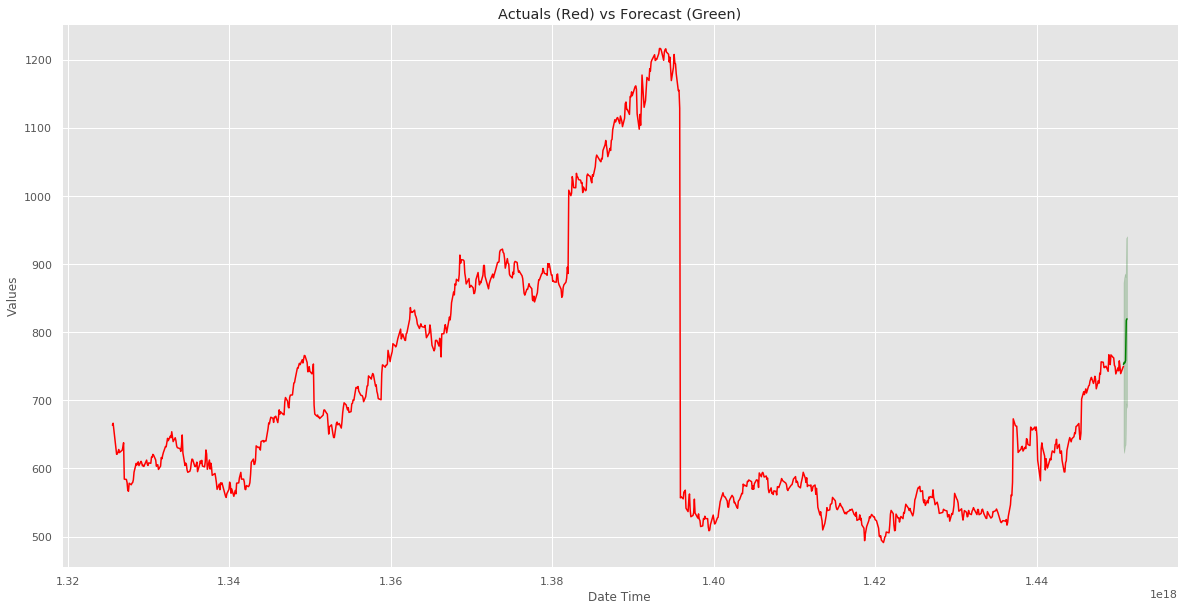

Error in FB Prophet components forecast. Continuing...
    RMSE = 2.83
    Std Deviation of Originals = 183.13
    Normalized RMSE = 2%

Best Model is:
    FB_Prophet
    Best Model Score: 2.83


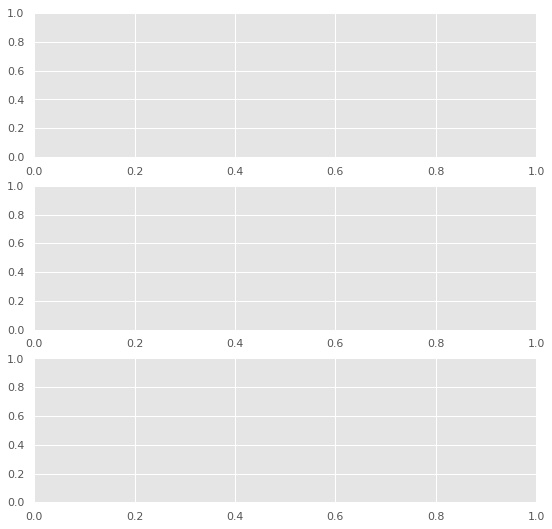

In [9]:
mldict = AT.Auto_Timeseries(dft, ts_column,
                            sep, target, score_type, forecast_period,
                            timeinterval, non_seasonal_pdq, seasonality=seasonality,
                            seasonal_period=seasonal_periods, seasonal_PDQ=None, conf_int=0.95, 
                            model_type="prophet", 
                            verbose=1)